In [6]:
import os
from tqdm import tqdm
from pyteomics import mgf

def parse_mgf(filepath, length):
    peptides = []
    print(f"Parsing {filepath}")
    with mgf.read(filepath, use_index=False, convert_arrays=0, read_charges=False, read_ions=False) as spectra:
        for spec in tqdm(spectra, total=length):
            # Assume peptide ID is in TITLE field (adjust if stored differently)
            peptides.append(spec['params']['seq'])

    return peptides

def count_unique_growth(peptides):
    seen = set()
    growth = []
    for pep in peptides:
        seen.add(pep)
        growth.append(len(seen))
    return growth

massivekb_dir = "/mnt/data/cdens/casanovo-scaling/massivekb_data/"
scaling_dir = os.path.join(massivekb_dir, f"scaling_data_max_100000")

file_2s = os.path.join(scaling_dir, "train_2s_100000p.mgf")
file_20s = os.path.join(scaling_dir, "train_20s_100000p.mgf")

peptides2s = parse_mgf(file_2s, 200000)
peptides20s = parse_mgf(file_20s, 2000000)

growth2s = count_unique_growth(peptides2s)
growth20s = count_unique_growth(peptides20s)


Parsing /mnt/data/cdens/casanovo-scaling/massivekb_data/scaling_data_max_100000/train_2s_100000p.mgf


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200000/200000 [00:18<00:00, 10568.53it/s]


Parsing /mnt/data/cdens/casanovo-scaling/massivekb_data/scaling_data_max_100000/train_20s_100000p.mgf


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2000000/2000000 [03:21<00:00, 9943.76it/s]


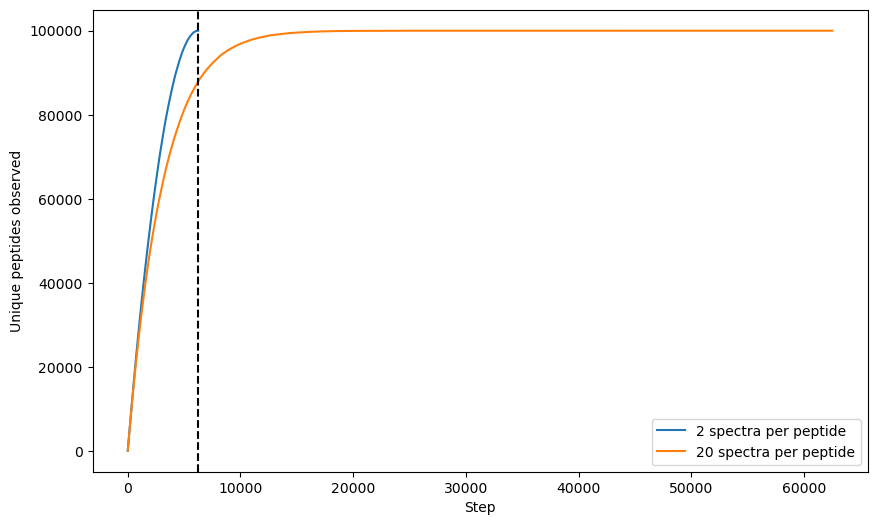

In [10]:
import numpy as np
import matplotlib.pyplot as plt

steps1 = np.arange(1, len(growth2s)+1) / 32
steps2 = np.arange(1, len(growth20s)+1) / 32

plt.figure(figsize=(10,6))
plt.plot(steps1, growth2s, label="2 spectra per peptide")
plt.plot(steps2, growth20s, label="20 spectra per peptide")
plt.axvline(x=6250, color='black', linestyle='--')

plt.xlabel("Step")
plt.ylabel("Unique peptides observed")
plt.legend()
plt.show()